# **FinSight Banking Analytics - Phase 1**

Step-1 - Import Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


Step-2 - Load the Dataset

In [ ]:
df = pd.read_csv('creditcard.csv')

print(" Dataset loaded successfully!")
print(f" Total transactions: {df.shape[0]:,}")
print(f" Total columns: {df.shape[1]}")
print(f"\n First look at the data:")
df.head()

 Dataset loaded successfully!
 Total transactions: 215,946
 Total columns: 31

 First look at the data:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Step 3: Explore the Dataset

In [ ]:
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nBasic Statistics:\n", df.describe())

Dataset Shape: (215946, 31)

Column Names: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Data Types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

Missing Values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11   

Step 4: Clean the Dataset

In [ ]:
df = df.dropna()
df['Class'] = df['Class'].astype(int)

# Check fraud vs normal distribution
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

print("Dataset after cleaning:", df.shape)
print("Normal transactions:", len(normal))
print("Fraud transactions:", len(fraud))
print("Fraud percentage:", round(len(fraud)/len(df)*100, 4), "%")

Dataset after cleaning: (215945, 31)
Normal transactions: 215544
Fraud transactions: 401
Fraud percentage: 0.1857 %


Step 5: Scale the Amount Column and Drop Time

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Scale Amount column
df['Amount_Scaled'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Drop original Amount and Time columns (not needed for ML)
df = df.drop(['Time', 'Amount'], axis=1)

print("Cleaned dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Sample of scaled amount:")
print(df['Amount_Scaled'].head())

Cleaned dataset shape: (215945, 30)
Columns: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'Amount_Scaled']
Sample of scaled amount:
0    0.238782
1   -0.352233
2    1.160079
3    0.133716
4   -0.081524
Name: Amount_Scaled, dtype: float64


Step 6: Visualise Fraud vs Normal Transactions

/tmp/ipython-input-374100286.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette=['#1F3D7A', '#E74C3C'])


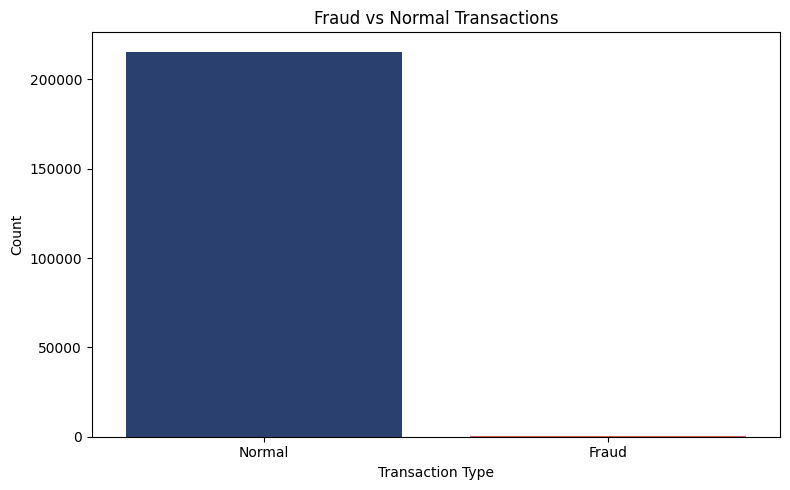

Normal transactions: 215544
Fraud transactions: 401


In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=df, palette=['#1F3D7A', '#E74C3C'])
plt.title('Fraud vs Normal Transactions')
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print("Normal transactions:", df[df['Class']==0].shape[0])
print("Fraud transactions:", df[df['Class']==1].shape[0])

Step 7: Save Cleaned Dataset

In [ ]:
df.to_csv('creditcard_cleaned.csv', index=False)

print("Cleaned dataset saved successfully!")
print("Final shape:", df.shape)
print("Ready for Phase 2 - SQL & Database Analysis")

Cleaned dataset saved successfully!
Final shape: (215945, 30)
Ready for Phase 2 - SQL & Database Analysis


# **Phase 2 - Upload cleaned data to Supabase PostgreSQL**

In [ ]:
!pip install psycopg2-binary sqlalchemy -q

from sqlalchemy import create_engine
import pandas as pd


df = pd.read_csv('creditcard_cleaned.csv')


DB_USER = "postgres"
DB_PASSWORD = "Mohammedshawaiz5"
DB_HOST = "db.qbednkunhmcioegmmczg.supabase.co"
DB_PORT = "5432"
DB_NAME = "postgres"

engine = create_engine(f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

print("Connection string ready!")

Connection string ready!


Upload cleaned data to Supabase PostgreSQL

In [ ]:
print("Uploading data to Supabase...")
print("This may take a few minutes - 215,945 rows!")

df.to_sql(
    'transactions',
    engine,
    if_exists='append',
    index=False,
    chunksize=1000
)

print("Data uploaded successfully!")
print("Total rows uploaded:", len(df))

Uploading data to Supabase...
This may take a few minutes - 215,945 rows!


OperationalError: (psycopg2.OperationalError) connection to server at "db.qbednkunhmcioegmmczg.supabase.co" (2406:da18:243:7415:20b4:56d2:7106:7002), port 5432 failed: Network is unreachable
	Is the server running on that host and accepting TCP/IP connections?

(Background on this error at: https://sqlalche.me/e/20/e3q8)

Use Session Pooler instead of Direct connection

In [ ]:
DB_USER = "postgres.qbednkunhmcioegmmczg"
DB_PASSWORD = "Mohammedshawaiz5"
DB_HOST = "aws-0-ap-southeast-1.pooler.supabase.com"  # new host
DB_PORT = "5432"
DB_NAME = "postgres"

engine = create_engine(f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

print("Connection string updated!")

Connection string updated!


In [ ]:
print("Uploading data to Supabase...")
print("This may take a few minutes - 215,945 rows!")

df.to_sql(
    'transactions',
    engine,
    if_exists='append',
    index=False,
    chunksize=1000
)

print("Data uploaded successfully!")
print("Total rows uploaded:", len(df))

Uploading data to Supabase...
This may take a few minutes - 215,945 rows!


OperationalError: (psycopg2.OperationalError) connection to server at "aws-0-ap-southeast-1.pooler.supabase.com" (54.255.219.82), port 5432 failed: FATAL:  Tenant or user not found
connection to server at "aws-0-ap-southeast-1.pooler.supabase.com" (54.255.219.82), port 5432 failed: FATAL:  Tenant or user not found

(Background on this error at: https://sqlalche.me/e/20/e3q8)

In [ ]:
DB_USER = "postgres.qbednkunhmcioegmmczg"
DB_PASSWORD = "Mohammedshawaiz5"
DB_HOST = "aws-1-ap-southeast-1.pooler.supabase.com"
DB_PORT = "5432"
DB_NAME = "postgres"

engine = create_engine(f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

print("Connection string updated!")

Connection string updated!


In [ ]:
print("Uploading data to Supabase...")
print("This may take a few minutes - 215,945 rows!")

df.to_sql(
    'transactions',
    engine,
    if_exists='append',
    index=False,
    chunksize=1000
)

print("Data uploaded successfully!")
print("Total rows uploaded:", len(df))

Uploading data to Supabase...
This may take a few minutes - 215,945 rows!
Data uploaded successfully!
Total rows uploaded: 215945


# Phase 4 — ML Models & AI

In [ ]:
import pandas as pd

df = pd.read_csv('creditcard_cleaned.csv')
print("Dataset ready:", df.shape)

Dataset ready: (215945, 30)


**Step 1: Prepare data for ML model**

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("Fraud cases in training:", y_train.sum())
print("Fraud cases in testing:", y_test.sum())

Training set size: (172756, 29)
Testing set size: (43189, 29)
Fraud cases in training: 321
Fraud cases in testing: 80


**Step 2 - Handle class imbalance with SMOTE**

In [ ]:
!pip install imbalanced-learn -q

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE - Fraud cases:", y_train.sum())
print("After SMOTE - Fraud cases:", y_train_smote.sum())
print("After SMOTE - Normal cases:", (y_train_smote == 0).sum())

Before SMOTE - Fraud cases: 321
After SMOTE - Fraud cases: 172435
After SMOTE - Normal cases: 172435


**Step 3 - Train Random Forest Model**

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_smote, y_train_smote)

# Predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

print("Model trained successfully!")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", round(roc_auc_score(y_test, y_pred_proba), 4))

Model trained successfully!

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     43109
           1       0.94      0.84      0.89        80

    accuracy                           1.00     43189
   macro avg       0.97      0.92      0.94     43189
weighted avg       1.00      1.00      1.00     43189

ROC AUC Score: 0.9819


**Step 4 - Visualise Results**

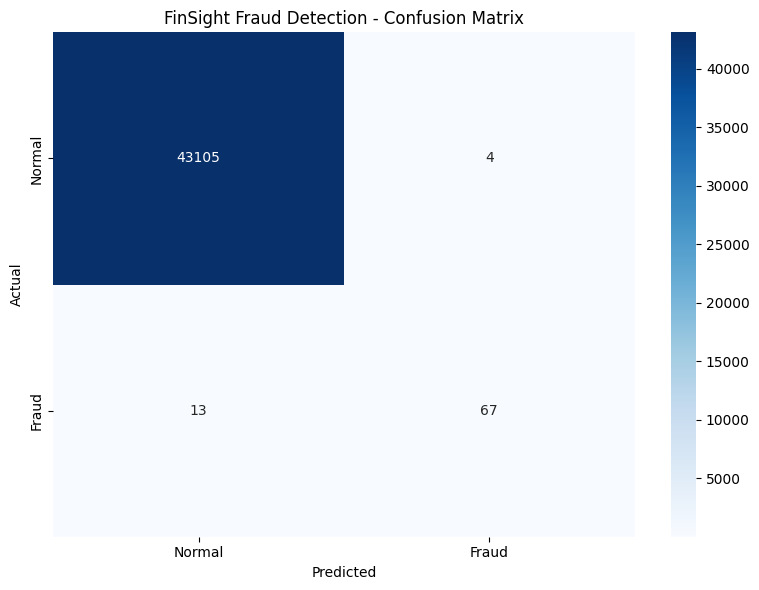

Confusion matrix saved!


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title('FinSight Fraud Detection - Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()
print("Confusion matrix saved!")

**Step 5 - Feature Importance**

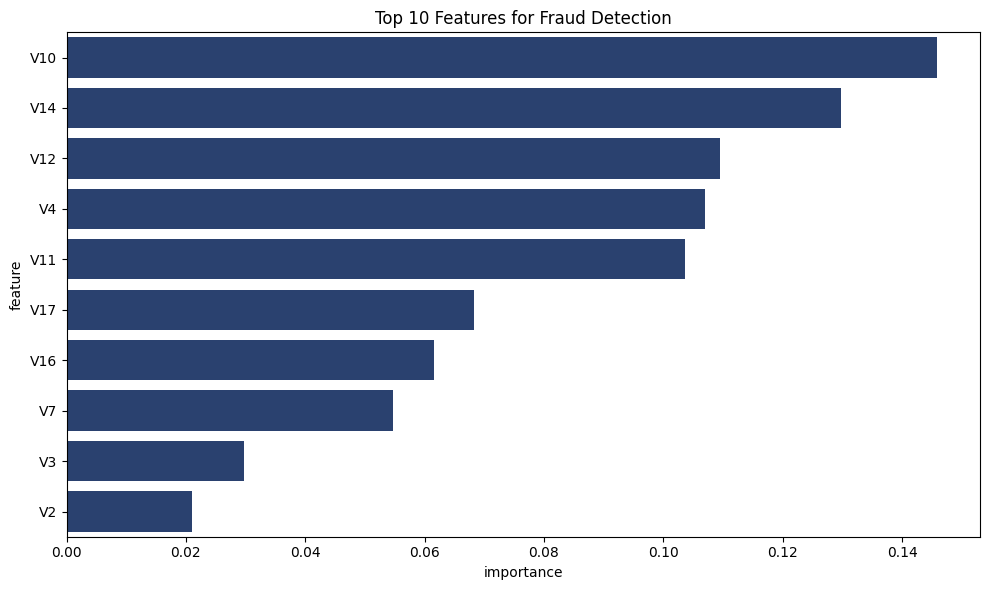

Top 10 features: ['V10', 'V14', 'V12', 'V4', 'V11', 'V17', 'V16', 'V7', 'V3', 'V2']


In [25]:
# Which features matter most for fraud detection
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance, color='#1F3D7A')
plt.title('Top 10 Features for Fraud Detection')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()
print("Top 10 features:", feature_importance['feature'].tolist())

In [26]:
# Save the trained model

import joblib

joblib.dump(rf_model, 'fraud_detection_model.pkl')

print("Model saved successfully!")
print("File: fraud_detection_model.pkl")

Model saved successfully!
File: fraud_detection_model.pkl
